# Week 12 - Text Analysis

## 텍스트 전처리의 개요
- 클렌징 (Cleansing) : 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업. 예를 들어 HTML, XML 태그, 특정 기호 등을 사전에 제거.
- 토큰화 (Tokenization) : 문장 토큰화, 단어 토큰화, n-gram
- 필터링/스톱워드 제거/철자 제거 : 불필요한 단어나 분석에 큰 의미가 없는 단어(a, thi ,will 등). 잘못된 철자 수정
- Stemming/Lemmatiziation : 어근(단어 원형) 추출, Lemmatization이 Stemming보다 정교하고 의미론적 기반에서 단어 원형을 찾아줌.

## N-gram

문장을 개별 단어 별로 토큰화 할 경우에는 문맥적인 의미가 무시된다. 이런 문제를 해결하기 위해 도입된 것이 N-gram이다.  N-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해내는 것이다. n개의 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행한다.

예를 들어 'Agent Smith knocks the door'를 2-gram(bigram)으로 만들면 (Agent, Smith), (Smith, Knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화한다.

## 토큰화 

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\정호섭\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 문장 토큰화

In [14]:
import nltk
from nltk import sent_tokenize

text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

# 문장 토큰화. 개행 문자나 마침표로 토큰화 된다.
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


### 단어 토큰화

In [15]:
from nltk import word_tokenize

# 공백이나 다른 정규화 방식에 따라 토큰화 된다.
sentence =  "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


### 여러 문장들에 대한 단어 토큰화

In [22]:
# 여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    
    # 분리된  문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장들에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### n-gram

In [17]:
from nltk import ngrams

sentence =  "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

# trygram 생성
all_ngrams = ngrams(words, 3)
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix', 'is'), ('Matrix', 'is', 'everywhere'), ('is', 'everywhere', 'its'), ('everywhere', 'its', 'all'), ('its', 'all', 'around'), ('all', 'around', 'us'), ('around', 'us', ','), ('us', ',', 'here'), (',', 'here', 'even'), ('here', 'even', 'in'), ('even', 'in', 'this'), ('in', 'this', 'room'), ('this', 'room', '.')]


## Stopwords 제거

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\정호섭\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# corpus 말뭉치
print('영어 stop words 개수', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [25]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for sentence in word_tokens:
    filtered_words = []
    
    # 개별 문장별로 tokenize 된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        word = word.lower()
        
        # tokenize 된 개별 word가 stop words들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
        
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


## Stemming / Lemmatization

In [27]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))

work work work
amus amus amus


위와 같이 Steeming을 통해 어근을 추출할 수 있다.

그런데 사실은 amuse가 맞다.

In [33]:
# from nltk.stem import WordNetLemmatizer

# lemma = WordNetLemmatizer()
# print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))

Lemmatization은 품사를 설정해줘야하는 번거로움이 있다.

# BOW
[Bag-of-Words에 대한 설명](https://en.wikipedia.org/wiki/Bag-of-words_model)

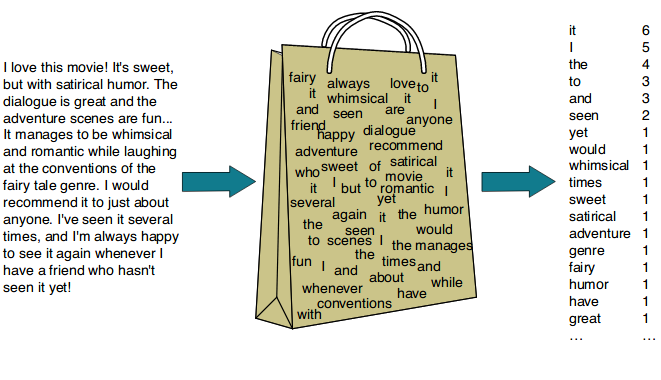

<b> 장점 </b>
- 쉽고 빠른 구축이 가능하다.
- <b> 예상보다 </b> 문서의 특징을 잘 나타내어, 전통적으로 여러 분야에서 활용도가 높다.

<b> 단점 </b>
- 문맥(Semantic context) 반영 문제가 있다.
- 희소 행렬 (sparse matrix) 문제가 있다.

### BOW의 유형
- 단순 카운트 기반의 벡터화 : 단어 피처에 값을 부여할 때, 각 문서에서 해당 단어가 나타나는 횟수. 즉 count를 부여하는 경우를 '카운트 벡터화'라고 한다. 카운트 벡터화에선 카운트 값이 높을수록 중요한 단어로 인식된다.
- TF - IDF 벡터화 : count만 부여할 경우, 그 문서의 특징을 나타내기보단 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 된다. 이런 문제를 보완하기 위해 'Term Frequency Inverse Document Frequency 벡터화'를 사용한다. 이 벡터화는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해선 <b> 페널티 </b>를 주는 방식으로 값을 부여한다.

### TF-IDF
특정 단어가 다른 문서에선 잘 나타나지 않고, 특정 문서에서만 자주 사용되면, 해당 단어는 해당 문서를 잘 특징 짓는 중요 단어일 가능성이 높다. 반면 특정 단어가 매우 많은 문서에서 빈번하게 나타나면 해당 단어는 개별 문서를 특징 짓는 정보로는 부적절하다.

지표
- TF (Term Frequency) : 문서에서 해당 단어가 얼마나 나왔는지를 나타내는 지표
- DF (Document Frequency) : 해당 단어가 몇 개의 문서에서 나타났는지를 나타내는 지표
- IDF ( Inverse Document Frequency) : DF의 역수로, n (전체 문서 수) / DF